In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score


In [7]:
reviews_df = pd.read_csv('clothing_reviews_clean.csv')

In [8]:
reviews_df.head()

,Unnamed: 0,review,recommended,length,polarity,lower,no_punc,no_stop,no_num,words_removed,token,pos_tags,lemmatized,joined
0,0,Absolutely wonderful - silky and sexy and comf...,1,53,0.633333,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,"['absolutely', 'wonderful', 'silky', 'sexy', '...","[('absolutely', 'RB'), ('wonderful', 'JJ'), ('...","['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable
1,1,Love this dress! it's sooo pretty. i happene...,1,303,0.339583,love this dress! it's sooo pretty. i happened ...,love this dress its sooo pretty i happened to ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love sooo pretty happened find store glad bc n...,"['love', 'sooo', 'pretty', 'happened', 'find',...","[('love', 'VB'), ('sooo', 'NN'), ('pretty', 'R...","['love', 'sooo', 'pretty', 'happen', 'find', '...",love sooo pretty happen find store glad bc nev...
2,2,I had such high hopes for this dress and reall...,0,500,0.073675,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,high hopes really wanted work initially ordere...,"['high', 'hopes', 'really', 'wanted', 'work', ...","[('high', 'JJ'), ('hopes', 'NNS'), ('really', ...","['high', 'hope', 'really', 'want', 'work', 'in...",high hope really want work initially order pet...
3,3,"I love, love, love this jumpsuit. it's fun, fl...",1,124,0.550000,"i love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...","[('love', 'VB'), ('love', 'NN'), ('love', 'NN'...","['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",love love love jumpsuit fun flirty fabulous ev...
4,4,This shirt is very flattering to all due to th...,1,192,0.512891,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,flattering due adjustable front tie perfect le...,"['flattering', 'due', 'adjustable', 'front', '...","[('flattering', 'VBG'), ('due', 'JJ'), ('adjus...","['flatter', 'due', 'adjustable', 'front', 'tie...",flatter due adjustable front tie perfect lengt...


In [9]:
reviews_df['recommended'].value_counts()

1    18540
0     4101
Name: recommended, dtype: int64

In [10]:
analysis_df = reviews_df[['recommended', 'lemmatized']]

In [11]:
analysis_df['recommended']

0        1
1        1
2        0
3        1
4        1
        ..
22636    1
22637    1
22638    0
22639    1
22640    1
Name: recommended, Length: 22641, dtype: int64

In [12]:
X = analysis_df['lemmatized']
y = analysis_df['recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Model 1: Vectorizer + TFID transformer + Naive Bayes

In [13]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

17087

In [14]:
model_nb = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [15]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8330757341576507
              precision    recall  f1-score   support

           0       0.95      0.15      0.25       877
           1       0.83      1.00      0.91      3652

    accuracy                           0.83      4529
   macro avg       0.89      0.57      0.58      4529
weighted avg       0.85      0.83      0.78      4529



Model 2: Vectorizer + Naive Bayes

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [17]:
vectorizer = CountVectorizer(ngram_range = (1,2)) 
classifier = MultinomialNB()

In [18]:
sentiment_pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])

In [19]:
sentiment_pipeline.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = sentiment_pipeline.predict(X_test)

In [20]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8330757341576507
              precision    recall  f1-score   support

           0       0.89      0.16      0.27       877
           1       0.83      1.00      0.91      3652

    accuracy                           0.83      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.84      0.83      0.78      4529



Model 3: Balanced Samples. Vectorizer + TFID transformer + Naive Bayes.

In [21]:
pos_df = analysis_df[analysis_df['recommended'] == 1]
neg_df = analysis_df[analysis_df['recommended'] == 0]

In [22]:
pos_sample = pos_df.sample(4000)
neg_sample = neg_df.sample(4000)

In [23]:
new_df = pd.concat([pos_sample, neg_sample])

In [24]:
new_df = new_df.reset_index(drop = True)

In [25]:
new_df

,recommended,lemmatized
0,1,"['adorable', 'love', 'however', 'pink', 'pink'..."
1,1,"['love', 'soft', 'comfortable', 'wore', 'casua..."
2,1,"['buy', 'fall', 'wedding', 'absolutely', 'gorg..."
3,1,"['amaze', 'swimsuit', 'hunt', 'perfect', 'piec..."
4,1,"['wonderful', 'trouser', 'pant', 'love', 'fit'..."
...,...,...
7995,0,"['want', 'love', 'kimonoit', 'beautiful', 'wor..."
7996,0,"['beautiful', 'springsummer', 'quality', 'mate..."
7997,0,"['think', 'clean', 'look', 'theoryvince', 'men..."
7998,0,"['didnt', 'realize', 'sequin', 'design', 'keep..."


In [26]:
X = new_df['lemmatized']
y = new_df['recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train

1001    ['true', 'look', 'sexy', 'model', 'much', 'mod...
7360    ['petite', 'know', 'buy', 'big', 'portrayed', ...
5234    ['want', 'love', 'beautiful', 'color', 'cute',...
7390    ['knit', 'thin', 'knit', 'shirt', 'find', 'get...
6841    ['love', 'cloth', 'stone', 'softness', 'pretti...
                              ...                        
4931    ['look', 'like', 'could', 'get', 'really', 'wr...
3264    ['much', 'cuter', 'picture', 'buy', 'c', 'thin...
1653    ['duster', 'light', 'weight', 'good', 'inside'...
2607    ['love', 'dressy', 'yet', 'comfy', 'perfect', ...
2732    ['want', 'several', 'month', 'ago', 'stock', '...
Name: lemmatized, Length: 6400, dtype: object

In [28]:
X_test

3069    ['approx', 'lb', 'dress', 'purchase', 'suggest...
1675    ['great', 'pant', 'wedge', 'teacher', 'perfect...
6385    ['despite', 'delicacy', 'femininity', 'pattern...
543     ['go', 'local', 'store', 'blue', 'stock', 'see...
3213    ['try', 'instore', 'grey', 'super', 'comfy', '...
                              ...                        
7716    ['purplecobalt', 'beautiful', 'feel', 'entirel...
4766    ['wore', 'romper', 'x', 'wash', 'hem', 'shorts...
4096    ['really', 'want', 'love', 'love', 'color', 'd...
1595    ['usually', 'super', 'girly', 'top', 'could', ...
5023    ['purchase', 'tan', 'love', 'however', 'loose'...
Name: lemmatized, Length: 1600, dtype: object

In [29]:
y_train

1001    1
7360    0
5234    0
7390    0
6841    0
       ..
4931    0
3264    1
1653    1
2607    1
2732    1
Name: recommended, Length: 6400, dtype: int64

In [30]:
y_test

3069    1
1675    1
6385    0
543     1
3213    1
       ..
7716    0
4766    0
4096    0
1595    1
5023    0
Name: recommended, Length: 1600, dtype: int64

In [31]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

6021

In [32]:
# I create a model pipeline including the vectorizer, TfidfTransformer and classifier

model_nb = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),                   # ignore terms that have a document frequency lower than 5
                   ('tfidf', TfidfTransformer()),                                                  # include unigrams and bigrams
                   ('clf', MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [33]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.831875
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       790
           1       0.86      0.80      0.83       810

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest, pred_y))

[[685 105]
 [164 646]]


NameError: name 'class_names' is not defined

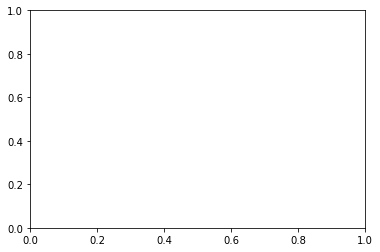

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

cnf_matrix = metrics.confusion_matrix(ytest, pred_y)
cnf_matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');